**Primer punto**

<ipython-input-1-5869613ad29b>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("data.txt", delim_whitespace=True, skiprows=2, names = columnas)


       Year  Month  Day   SSN      Fecha
0      1945      1    1  10.0 1945-01-01
1      1945      1    2   0.0 1945-01-02
2      1945      1    3   1.0 1945-01-03
3      1945      1    4   2.0 1945-01-04
4      1945      1    5  11.0 1945-01-05
...     ...    ...  ...   ...        ...
26658  2017     12   27   NaN 2017-12-27
26659  2017     12   28   NaN 2017-12-28
26660  2017     12   29   NaN 2017-12-29
26661  2017     12   30   NaN 2017-12-30
26662  2017     12   31   NaN 2017-12-31

[26663 rows x 5 columns]


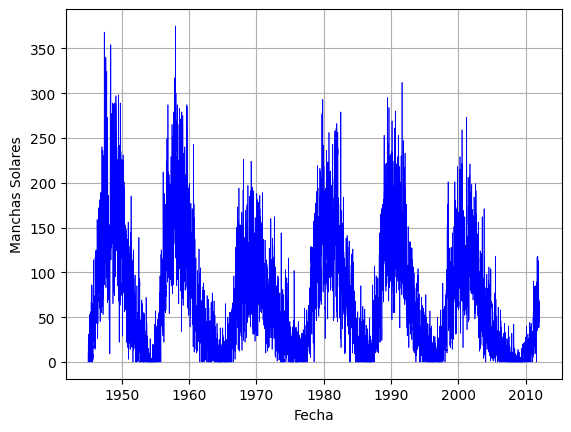

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

columnas = ["Year", "Month", "Day", "SSN"]

data = pd.read_csv("data.txt", delim_whitespace=True, skiprows=2, names = columnas)


data["Fecha"] = pd.to_datetime(data[['Year', 'Month', 'Day']])

print(data)

hasta = data[data["Fecha"] <= '2012-01-01']

plt.plot(hasta["Fecha"], hasta["SSN"], color='blue', linewidth=0.5)
plt.xlabel('Fecha')
plt.ylabel('Manchas Solares')
plt.grid(True)
plt.show()



1.1

[0.00028604]
[3496.]


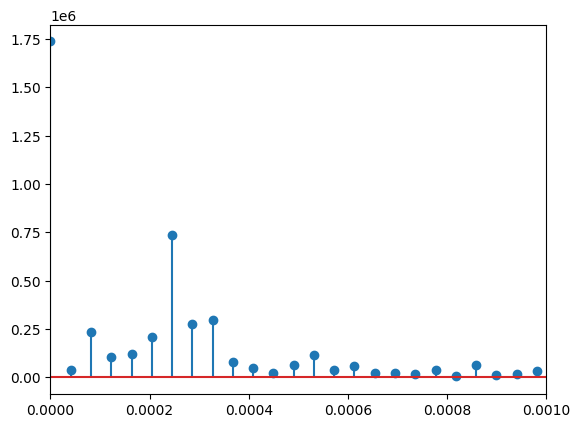

In [2]:
ssn_fft1= np.fft.fft(hasta['SSN'])
ssn_fft= abs(ssn_fft1)
N = len(hasta['SSN'])
freqs2=np.fft.fftfreq(N)
plt.stem(freqs2, ssn_fft)
max=np.where(ssn_fft[1:]==ssn_fft[1:].max())
print(-freqs2[max])
print(-1/freqs2[max])
plt.xlim(0,0.001)
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


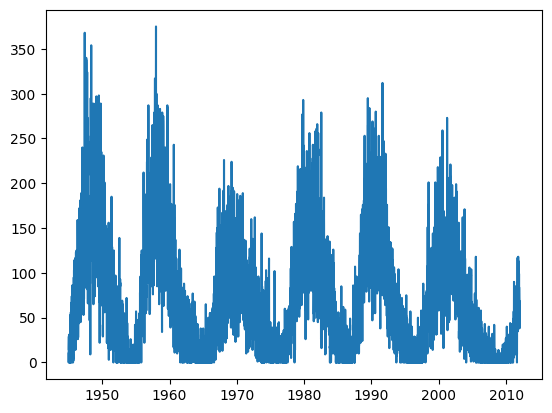

In [3]:
plt.plot(hasta["Fecha"], np.fft.ifft(ssn_fft1))




1.2

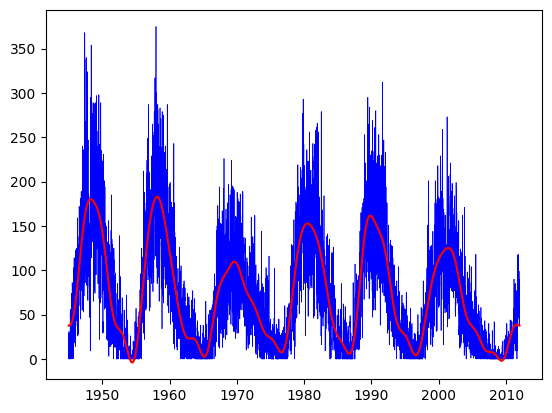

In [4]:
ssn_fft1_fil=ssn_fft1.copy()
cut_off=0.001
ssn_fft1_fil[np.abs(freqs2) > cut_off] = 0
señal_filtrada=np.fft.ifft( ssn_fft1_fil )

plt.plot(hasta["Fecha"], hasta["SSN"], color='blue', linewidth=0.5)
plt.plot(hasta["Fecha"],señal_filtrada,color="r")
plt.show()

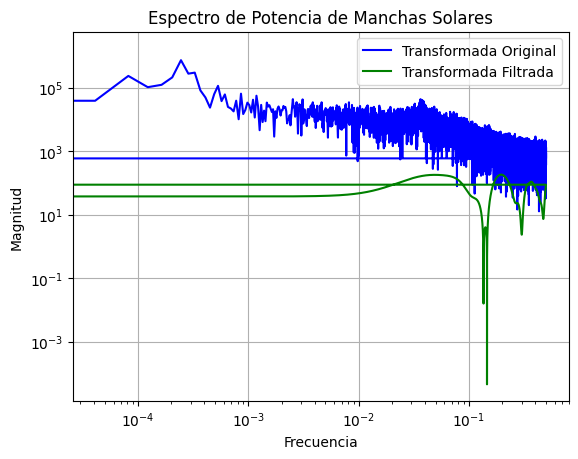

In [5]:
freqs = np.fft.fftfreq(len(hasta))
plt.loglog(freqs, np.abs(ssn_fft), label='Transformada Original', color='blue')

plt.loglog(freqs, np.abs(señal_filtrada), label='Transformada Filtrada', color='green')

plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.title('Espectro de Potencia de Manchas Solares')
plt.legend()
plt.grid(True)
plt.show()

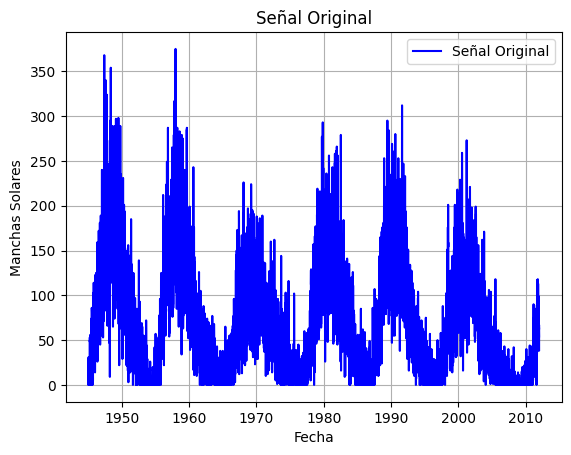

In [6]:
señal_original_inv = np.fft.ifft(ssn_fft).real
señal_filtrada_inv = np.fft.ifft(señal_filtrada).real

plt.plot(hasta["Fecha"], hasta["SSN"], label='Señal Original', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Manchas Solares')
plt.title('Señal Original')
plt.legend()
plt.grid(True)



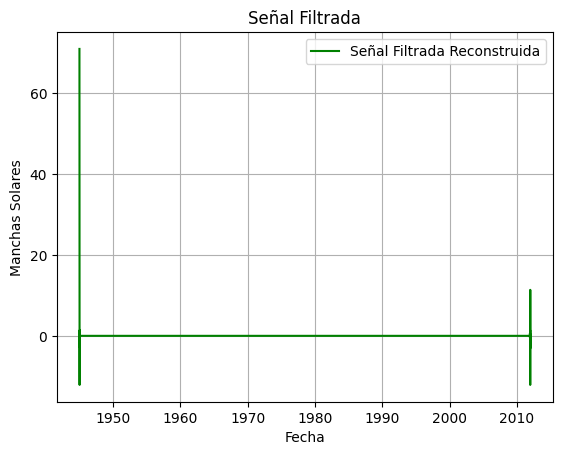

In [ ]:
plt.plot(hasta["Fecha"], señal_filtrada_inv, label='Señal Filtrada Reconstruida', color='green')
plt.xlabel('Fecha')
plt.ylabel('Manchas Solares')
plt.title('Señal Filtrada')
plt.legend()
plt.grid(True)

1.3

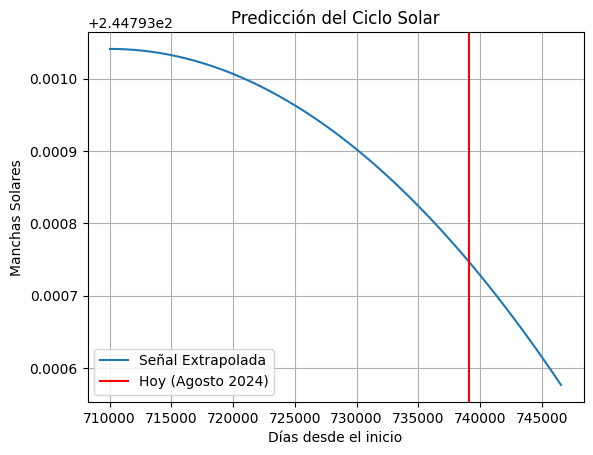

Se esperan aproximadamente 244.79374673919813 manchas solares a mitad de agosto de 2024.


In [ ]:
import datetime

n = 10

frecuencias_bajas = np.concatenate([freqs[:n], freqs[-n:]])
transformada_baja = np.concatenate([ssn_fft[:n], ssn_fft[-n:]])

inicio = hasta['Fecha'].min()
fin = pd.to_datetime('2045-01-01')
dias = (fin - inicio).days
tiempo = np.arange(dias)

N = len(hasta)
tiempos_normalizados = tiempo / N

senal_extra = np.zeros_like(tiempo, dtype=np.complex128)

for k in range(2*n):
    senal_extra += transformada_baja[k] * np.exp(2j * np.pi * tiempos_normalizados * frecuencias_bajas[k])

senal_extra /= N

senal_extraR = np.real(senal_extra)


fecha_actual = datetime.date(2024, 8, 15)
dias_actual = (fecha_actual - inicio.date()).days


actual = np.where(tiempo == dias_actual)[0][0]
manchas_solares_actuales = senal_extraR[actual]


plt.plot(tiempo + inicio.toordinal(), senal_extraR, label='Señal Extrapolada')
plt.axvline(x=fecha_actual.toordinal(), color='red', label='Hoy (Agosto 2024)')
plt.xlabel('Días desde el inicio')
plt.ylabel('Manchas Solares')
plt.title('Predicción del Ciclo Solar')
plt.legend()
plt.grid(True)
plt.show()


print("Se esperan aproximadamente", manchas_solares_actuales, "manchas solares a mitad de agosto de 2024.")


Variación 1.2

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft, fftfreq
import datetime

<ipython-input-7-244bfb82b283>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("data.txt", delim_whitespace=True, skiprows=2, names=columnas)
<ipython-input-7-244bfb82b283>:31: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.abs(frequencies)), np.log10(np.abs(ssn_fft[:N//2])))


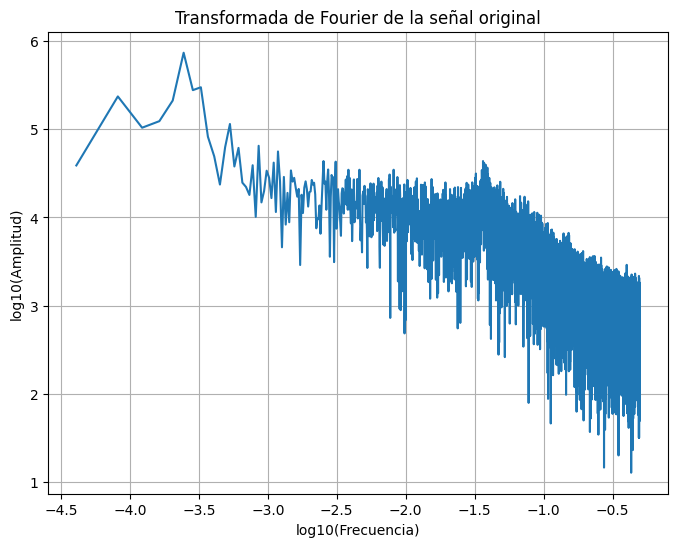

<ipython-input-7-244bfb82b283>:49: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.abs(frequencies)), np.log10(np.abs(filtered_fft_gaussian)), label='Gaussiano')


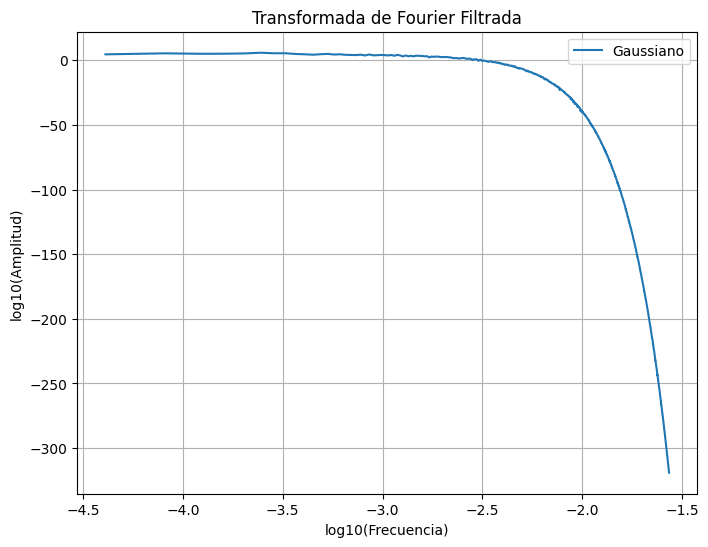

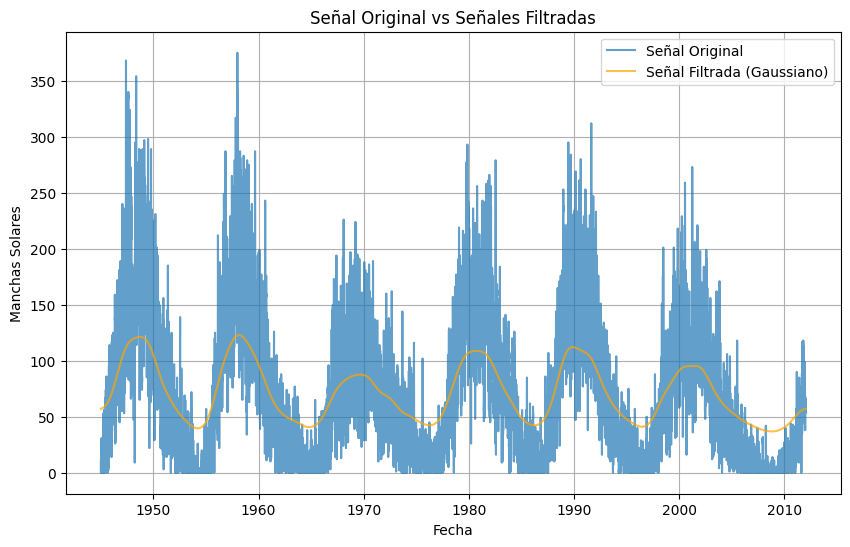

In [7]:
columnas = ["Year", "Month", "Day", "SSN"]
data = pd.read_csv("data.txt", delim_whitespace=True, skiprows=2, names=columnas)


data["Fecha"] = pd.to_datetime(data[['Year', 'Month', 'Day']])


hasta = data[data["Fecha"] <= '2012-01-01']


ssn = hasta["SSN"].values


dates = hasta["Fecha"].values
delta_t = (dates[1] - dates[0]).astype('timedelta64[D]').item().days
f_s = 1 / delta_t


N = len(ssn)
ssn_fft = fft(ssn)
frequencies = fftfreq(N, delta_t)[:N//2]


plt.figure(figsize=(8, 6))
plt.plot(np.log10(np.abs(frequencies)), np.log10(np.abs(ssn_fft[:N//2])))
plt.title('Transformada de Fourier de la señal original')
plt.xlabel('log10(Frecuencia)')
plt.ylabel('log10(Amplitud)')
plt.grid(True)
plt.show()


alpha = 1000
gaussian_filter = np.exp(-(frequencies * alpha) ** 2)



filtered_fft_gaussian = ssn_fft[:N//2] * gaussian_filter



plt.figure(figsize=(8, 6))
plt.plot(np.log10(np.abs(frequencies)), np.log10(np.abs(filtered_fft_gaussian)), label='Gaussiano')
plt.title('Transformada de Fourier Filtrada')
plt.xlabel('log10(Frecuencia)')
plt.ylabel('log10(Amplitud)')
plt.legend()
plt.grid(True)
plt.show()


filtered_signal_gaussian = np.real(ifft(filtered_fft_gaussian, N))


plt.figure(figsize=(10, 6))
plt.plot(hasta["Fecha"], ssn, label='Señal Original', alpha=0.7)
plt.plot(hasta["Fecha"], filtered_signal_gaussian, label='Señal Filtrada (Gaussiano)', color='orange', alpha=0.7)
plt.xlabel('Fecha')
plt.ylabel('Manchas Solares')
plt.title('Señal Original vs Señales Filtradas')
plt.legend()
plt.grid(True)
plt.show()



Corrección 1.3

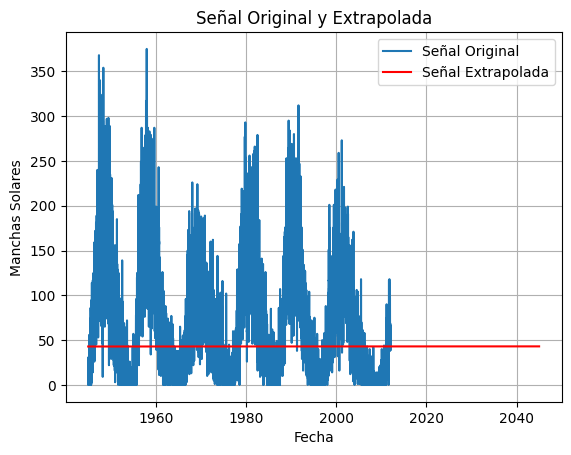

Manchas solares predichas para el 15 de agosto de 2024: 42.99


In [11]:
n = 10
top_n_freqs = np.concatenate((frequencies[:n], frequencies[-n:]))
top_n_fft = np.concatenate((ssn_fft[:n], ssn_fft[-n:]))


start_date = hasta["Fecha"].min()
future_date = pd.to_datetime("2045-01-01")
days_future = (future_date - start_date).days
time_future = np.arange(0, days_future)


reconstructed_signal = np.zeros_like(time_future, dtype=complex)

for k in range(2*n):
    reconstructed_signal += top_n_fft[k] * np.exp(2j * np.pi * time_future * top_n_freqs[k] / N)


reconstructed_signal /= N


plt.plot(hasta["Fecha"], ssn, label='Señal Original')
plt.plot(pd.date_range(start=start_date, periods=len(reconstructed_signal)), np.real(reconstructed_signal), label='Señal Extrapolada', color='red')
plt.xlabel('Fecha')
plt.ylabel('Manchas Solares')
plt.title('Señal Original y Extrapolada')
plt.legend()
plt.grid(True)
plt.show()


current_date = pd.to_datetime("2024-08-15")
days_current = (current_date - start_date).days
predicted_sunspots = np.real(reconstructed_signal[days_current])

print(f"Manchas solares predichas para el 15 de agosto de 2024: {predicted_sunspots:.2f}")